## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Reading the dataset
df = pd.read_csv("./credit_card_dataset.csv") 
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
# Observing the columns/features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# Describing the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Checking for the null values in the dataset
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Filling/Replacing the null values of the CREDIT_LIMIT & MINIMUM_PAYMENTS columns with their respective means
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [12]:
# Checking for null values in the entire dataset for one more time
df.isna().sum().sum()

0

In [16]:
# As we know that the Customer ID will be unique for everyone
df['CUST_ID'].value_counts().unique()

array([1], dtype=int64)

In [5]:
## Here, the customer ID is unique. So it can be dropped
df.drop('CUST_ID', axis=1, inplace=True)

In [6]:
# Now, Dropped the CUST_ID column from the dataet
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## **Visualizing the patterns**

In [23]:
px.scatter(df, x='PURCHASES', y='CREDIT_LIMIT')

In [32]:
px.scatter(df, x='TENURE', y='CREDIT_LIMIT')

In [7]:
# Now, the variables/features are assigning to X
X = df.iloc[:,:].values

## KMeans Clustering

Distortion Method


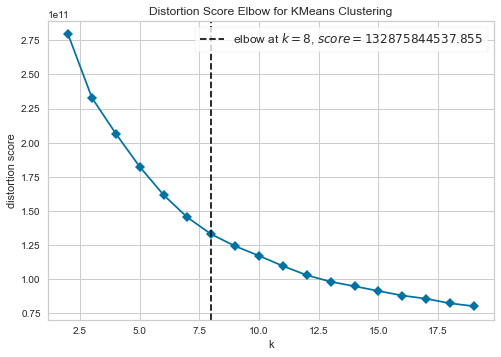

Silhouette Method


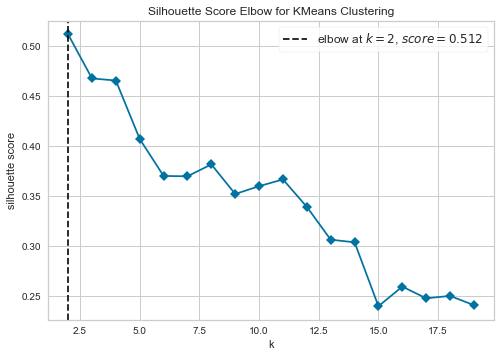

Calinski_harabasz Method


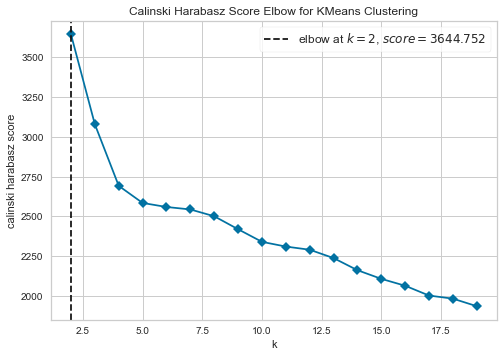

In [42]:
from sklearn.cluster import KMeans

# Creating the KMeans model
kmeans1 = KMeans(init='k-means++', random_state=42)

# Storing some clustering methods
methods = ['distortion', 'silhouette', 'calinski_harabasz']

# Visualizing each plot with different method in KMeans Clustering model
# And Checking optimal number of clusters
for method in methods:
    print(f"{method.capitalize()} Method")
    visualizer = KElbowVisualizer(kmeans1, k=(2,20), metric=method, timings=False)
    visualizer.fit(X)
    visualizer.show()


### By observing the above plots, we can say that Distortion method is most suitable plot & smoother one, so in that graph the optimal number of clusters is 8

In [45]:
# Creating a list to store the inertia of KMeans model for ith no of clusters
wcss = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

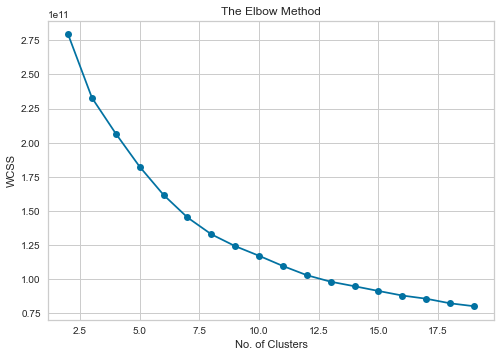

In [49]:
# Plotting the Elbow method and checking the optimal no of clusters
plt.plot(range(2,20), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Creating the KMeans model with 8 number of clusters
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [51]:
# Predicting Cluster number for the existing dataset
kmeans_pred = kmeans.predict(X)

In [78]:
# Scatter plot between BALANCE column and CREDIT_LIMIT column
px.scatter(df, x='BALANCE', y='CREDIT_LIMIT', title='CUSTOMERS')

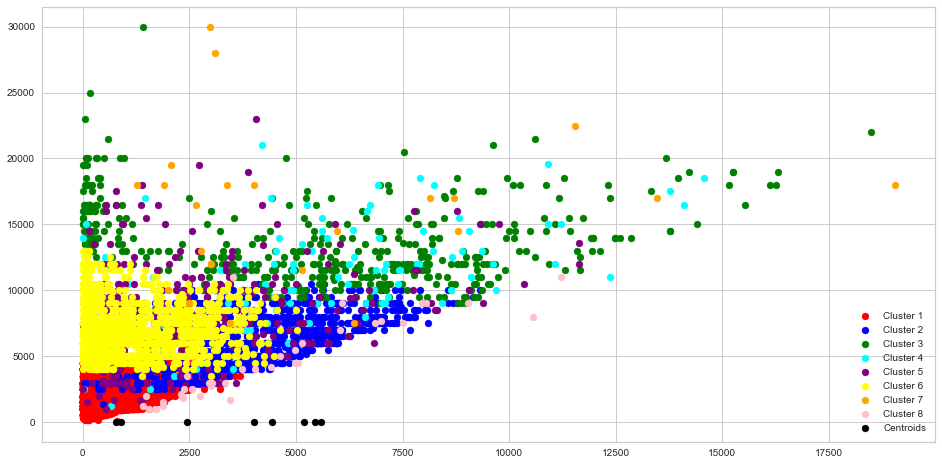

In [81]:
# Now, # Scatter plot between BALANCE column and CREDIT_LIMIT column with color of their respective cluster 
fig = plt.figure(figsize=(16,8))
plt.scatter(X[kmeans_pred==0,0], X[kmeans_pred==0,12], color='red', label='Cluster 1')
plt.scatter(X[kmeans_pred==1,0], X[kmeans_pred==1,12], color='blue', label='Cluster 2')
plt.scatter(X[kmeans_pred==2,0], X[kmeans_pred==2,12], color='green', label='Cluster 3')
plt.scatter(X[kmeans_pred==3,0], X[kmeans_pred==3,12], color='cyan', label='Cluster 4')
plt.scatter(X[kmeans_pred==4,0], X[kmeans_pred==4,12], color='purple', label='Cluster 5')
plt.scatter(X[kmeans_pred==5,0], X[kmeans_pred==5,12], color='yellow', label='Cluster 6')
plt.scatter(X[kmeans_pred==6,0], X[kmeans_pred==6,12], color='orange', label='Cluster 7')
plt.scatter(X[kmeans_pred==7,0], X[kmeans_pred==7,12], color='pink', label='Cluster 8')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroids')
plt.legend(loc='lower right')
plt.show()

## Conclusion

### From the above plot, We can conclude that we clustered the customers based on their features (i.e., payments, credit limits, etc.) and in future, anyone can apply other approaches such as hierarchical clustering to get optimal no of clusters.